In [1]:
# Import the data
import h5py
import numpy as np

In [10]:
ds=h5py.File('SVHN_single_grey1.h5','r')

In [3]:
list(ds.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [11]:
X_train = ds['X_train'][:]
y_train = ds['y_train'][:]
X_test = ds['X_test'][:]
y_test = ds['y_test'][:]
X_val = ds['X_val'][:]
y_val = ds['y_val'][:]

In [5]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

Instructions for updating:
non-resource variables are not supported in the long term


Using TensorFlow backend.


In [12]:
# reshaping X data: (n, 32, 32) => (n, 1024)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


# get the val data set
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, random_state=1, test_size=0.2)

In [13]:
X_train.shape , X_test.shape, X_val.shape

((33600, 1024), (18000, 1024), (8400, 1024))

In [14]:
# Close this file
ds.close()

In [15]:
X_train[0]

array([ 89.9371,  93.7518, 102.0391, ..., 125.2774, 125.9784, 130.1521],
      dtype=float32)

In [16]:
#Normalize the data

X_train = X_train/255
X_test = X_test/255
X_val = X_val/255

In [11]:
#Build KNN Model

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn=KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [19]:
knn.score(X_test,y_test)

0.30694444444444446

In [ ]:
#Not very impressive accuracy and the time taken to complete the claculation is very high
#Let's try to see if there is an optimal value of k that can give better accuracy

In [16]:
List=list(np.arange(3,15))
neigbors=list(filter(lambda x: x%2!=0,List))
Accuracy=[]
AUC_KNN=[]

In [17]:
for n in neigbors:
    knn=KNeighborsClassifier(n_neighbors=n, metric='euclidean')
    knn.fit(X_train, y_train)
    
    acc=knn.score(X_test,y_test)
    Accuracy.append(acc)
    
MissClassification=[1-x for x in Accuracy]
MissClassification.index(min(MissClassification))
print("Based on misclassification compariosn, optimal n: %i" %neigbors[MissClassification.index(min(MissClassification))])

Based on misclassification compariosn, optimal n: 3


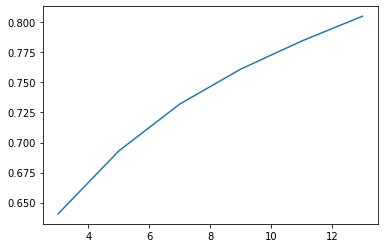

In [18]:
plt.plot(neigbors,MissClassification)

In [ ]:
#Looks like the increased value of k may give better accuracy as is evident from the graph above. Let's try out with k = 12

In [14]:
knn=KNeighborsClassifier(n_neighbors=12, metric='euclidean')
knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.1688888888888889

In [ ]:
#Worser score than before. Let's try with k = 8

In [15]:
knn=KNeighborsClassifier(n_neighbors=8, metric='euclidean')
knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.2001111111111111

In [ ]:
#Slight improvement but worser than when k=5. Let's try k=4

In [20]:
knn=KNeighborsClassifier(n_neighbors=4, metric='euclidean')
knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.2291111111111111

In [25]:
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import BatchNormalization, Dropout
from keras.layers import LeakyReLU

In [15]:
pip install talos

  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\bb\d7\6b\86fd8b1fc7cfbd2c54796412f86efb5fb6a3a5c734014f6a66
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\bf\1b\50\d0403ce6ef269e364894da7b50db68db14c4ac62c577561e2d
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\ae\70\21\c475cd079ec401dd6e1b9b1d42b4c38554ce12679bfb214aad
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\75\33\46\c871b94249bd57d17797d049b3dff8e3a09c315afb67eb14c6
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\36\6b\4c\e1fc6d7d8811940fbea1147b1519c7baa6933e4baeff904433
Successfully built talos wrangle astetik sklearn chances kerasplotlib
  Found existing installation: scipy 1.2.1
    Uninstalling scipy-1.2.1:
      Successfully uninstalled scipy-1.2.1
Note: you may need to restart the kernel to us

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\user\\anaconda3\\lib\\site-packages\\~cipy\\integrate\\lsoda.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [16]:
import talos as ta

ModuleNotFoundError: No module named 'talos'

# Defining the Fully Connected Layer

In [16]:
import numpy as np 

class Linear():
    def __init__(self, in_size, out_size):
        self.W = np.random.randn(in_size, out_size) * 0.01
        self.b = np.zeros((1, out_size))
        self.params = [self.W, self.b]
        self.gradW = None
        self.gradB = None
        self.gradInput = None

    def forward(self, X):
        self.X = X
        output = np.dot(self.X, self.W) + self.b
        return output

    def backward(self, nextgrad):
        self.gradW = np.dot(self.X.T, nextgrad)
        self.gradB = np.sum(nextgrad, axis=0)
        self.gradInput = np.dot(nextgrad, self.W.T)
        return self.gradInput, [self.gradW, self.gradB]

# Defining the Rectified Linear Activation Layer

In [17]:
class ReLU():
    def __init__(self):
        self.params = []
        self.gradInput = None

    def forward(self, X):
        self.output = np.maximum(X, 0)
        return self.output

    def backward(self, nextgrad):
        self.gradInput = nextgrad.copy()
        self.gradInput[self.output <=0] = 0
        return self.gradInput, []

# Defining Softmax

In [18]:
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Defining Cross Entropy Loss

In [20]:
class CrossEntropy:
    def forward(self, X, y):
        self.m = y.shape[0]
        self.p = softmax(X)
        cross_entropy = -np.log(self.p[range(self.m), y]+1e-16)
        loss = np.sum(cross_entropy) / self.m
        return loss
    
    def backward(self, X, y):
        y_idx = y.argmax()        
        grad = softmax(X)
        grad[range(self.m), y] -= 1
        grad /= self.m
        return grad

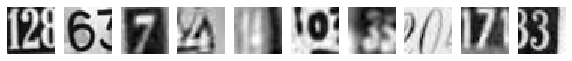

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [21]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

### Here, we define the container NN class that enables the forward prop and backward propagation of the entire network. Note, how this class enables us to add layers of different types and also correctly pass gradients using the chain rule.

In [22]:
class NN():
    def __init__(self, lossfunc=CrossEntropy(), mode='train'):
        self.params = []
        self.layers = []
        self.loss_func = lossfunc
        self.grads = []
        self.mode = mode
        
    def add_layer(self, layer):
        self.layers.append(layer)
        self.params.append(layer.params)

    def forward(self, X):
        for layer in self.layers:
            X = layer.forward(X)
        return X
    
    def backward(self, nextgrad):
        self.clear_grad_param()
        for layer in reversed(self.layers):
            nextgrad, grad = layer.backward(nextgrad)
            self.grads.append(grad)
        return self.grads
    
    def train_step(self, X, y):
        out = self.forward(X)
        loss = self.loss_func.forward(out,y)  + ((Lambda / (2 * y.shape[0])) * np.sum([np.sum(w**2) for w in self.params[0][0]]))
        nextgrad = self.loss_func.backward(out,y) + ((Lambda/y.shape[0]) * np.sum([np.sum(w) for w in self.params[0][0]]))
        grads = self.backward(nextgrad)
        return loss, grads
    
    def predict(self, X):
        X = self.forward(X)
        p = softmax(X)
        return np.argmax(p, axis=1)
    
    def predict_scores(self, X):
        X = self.forward(X)
        p = softmax(X)
        return p
    
    def clear_grad_param(self):
        self.grads = []

# Defining the update function (SGD)

In [23]:
def update(velocity, params, grads, learning_rate=0.01, mu=0.9):
    for v, p, g, in zip(velocity, params, reversed(grads)):
        for i in range(len(g)):
            v[i] = (mu * v[i]) - (learning_rate * g[i])
            p[i] += v[i]

#### Defining a function which gives us the minibatches (both the datapoint and the corresponding label)

In [24]:
# get minibatches
def minibatch(X, y, minibatch_size):
    n = X.shape[0]
    minibatches = []
    permutation = np.random.permutation(X.shape[0])
    X = X[permutation]
    y = y[permutation]
    
    for i in range(0, n , minibatch_size):
        X_batch = X[i:i + minibatch_size, :]
        y_batch = y[i:i + minibatch_size, ]

        minibatches.append((X_batch, y_batch))
    return minibatches

# The training loop

In [25]:
def sgd(net, X_train, y_train, minibatch_size, epoch, learning_rate, mu=0.9, X_val=None, y_val=None, Lambda=0, verb=True):
    val_loss_epoch = []
    minibatches = minibatch(X_train, y_train, minibatch_size)
    minibatches_val = minibatch(X_val, y_val, minibatch_size)
    
    for i in range(epoch):
        loss_batch = []
        val_loss_batch = []
        velocity = []
        for param_layer in net.params:
            p = [np.zeros_like(param) for param in list(param_layer)]
            velocity.append(p)
            
        # iterate over mini batches
        for X_mini, y_mini in minibatches:
            loss, grads = net.train_step(X_mini, y_mini)
            loss_batch.append(loss)
            update(velocity, net.params, grads, learning_rate=learning_rate, mu=mu)

        for X_mini_val, y_mini_val in minibatches_val:
            val_loss, _ = net.train_step(X_mini, y_mini)
            val_loss_batch.append(val_loss)
        
        # accuracy of model at end of epoch after all mini batch updates
        m_train = X_train.shape[0]
        m_val = X_val.shape[0]
        y_train_pred = []
        y_val_pred = []
        y_train1 = []
        y_vall = []
        for ii in range(0, m_train, minibatch_size):
            X_tr = X_train[ii:ii + minibatch_size, : ]
            y_tr = y_train[ii:ii + minibatch_size,]
            y_train1 = np.append(y_train1, y_tr)
            y_train_pred = np.append(y_train_pred, net.predict(X_tr))

        for ii in range(0, m_val, minibatch_size):
            X_va = X_val[ii:ii + minibatch_size, : ]
            y_va = y_val[ii:ii + minibatch_size,]
            y_vall = np.append(y_vall, y_va)
            y_val_pred = np.append(y_val_pred, net.predict(X_va))
            
        train_acc = check_accuracy(y_train1, y_train_pred)
        val_acc = check_accuracy(y_vall, y_val_pred)
        
        ## weights
        w = np.array(net.params[0][0])
        
        ## adding regularization to cost
        mean_train_loss = (sum(loss_batch) / float(len(loss_batch)))
        mean_val_loss = sum(val_loss_batch) / float(len(val_loss_batch))
        
        val_loss_epoch.append(mean_val_loss)
        if verb:
            if i%50==0:
                print("Epoch {3}/{4}: Loss = {0} | Training Accuracy = {1}".format(mean_train_loss, train_acc, val_acc, i, epoch))
    return net, val_acc

# Function for checking Accuracy

In [26]:
def check_accuracy(y_true, y_pred):
    count = 0
    for i,j in zip(y_true, y_pred):
        if int(i)==j:
            count +=1
    return float(count)/float(len(y_true))

# Flattening and normalizing the data

In [29]:
X_train.shape, X_test.shape

((42000, 32, 32), (18000, 32, 32))

In [34]:
#Flattenning of the features sets

X_train = X_train.reshape(42000, 1024)
print (X_train.shape)
X_test = X_test.reshape(18000, 1024)
print( X_test.shape)

(42000, 1024)
(18000, 1024)


In [45]:
# # normalize inputs
X_train = (X_train-np.mean(X_train))/np.std(X_train)
X_test = (X_test-np.mean(X_test))/np.std(X_test)

In [ ]:
#Function for training the model and testing it on the test data for accuracy and loss

In [49]:
from random import shuffle


## input size
input_dim = X_train.shape[1]

def train_and_test_loop(iterations, lr, Lambda, verb=True):
    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 10
    output_nodes = 10

    ## define neural net
    nn = NN()
    nn.add_layer(Linear(input_dim, hidden_nodes))

    nn, val_acc = sgd(nn, X_train , y_train, minibatch_size=1000, epoch=iterations, learning_rate=learning_rate,\
                      X_val=X_test, y_val=y_test, Lambda=Lambda, verb=verb)
    return val_acc

### Double Check that the loss is reasonable : Disable the regularization

In [50]:
lr = 0.00001
Lambda = 0
train_and_test_loop(1, lr, Lambda)

Epoch 0/1: Loss = 2.3218666994333788 | Training Accuracy = 0.09892857142857144


0.09844444444444445

We have 10 classes in the target variable and hence at random accuracy is expected to be around 100/10 i.e. value at random. We have it close to 10%. Hence it's good to go.

Loss also makes sense becasue the value of softax is .1 for all labels and negative log of .1 is around 2.1.

In [51]:
lr = 0.00001
Lambda = 1e3
train_and_test_loop(1, lr, Lambda)

Epoch 0/1: Loss = 4.228179270459172e+17 | Training Accuracy = 0.09840476190476191


0.09816666666666667

### Huge Loss which is what is expected since the accuracy is not poor and hence loss should be very high.

### Now, lets overfit to a small subset of our dataset, in this case 20 images.

In [53]:
X_train_subset = X_train[0:20]
y_train_subset = y_train[0:20]

X_train = X_train_subset
y_train = y_train_subset

In [55]:
lr = 0.0001
Lambda = 0
train_and_test_loop(2000, lr, Lambda)

Epoch 0/2000: Loss = 2.3875268479239895 | Training Accuracy = 0.15
Epoch 50/2000: Loss = 2.090608937656948 | Training Accuracy = 0.35
Epoch 100/2000: Loss = 1.8911842115878268 | Training Accuracy = 0.55
Epoch 150/2000: Loss = 1.7469563229405671 | Training Accuracy = 0.55
Epoch 200/2000: Loss = 1.633689919590148 | Training Accuracy = 0.65
Epoch 250/2000: Loss = 1.5391738950086853 | Training Accuracy = 0.7
Epoch 300/2000: Loss = 1.457226872576279 | Training Accuracy = 0.75
Epoch 350/2000: Loss = 1.3844583896404878 | Training Accuracy = 0.8
Epoch 400/2000: Loss = 1.3188260562149068 | Training Accuracy = 0.85
Epoch 450/2000: Loss = 1.2589951563462596 | Training Accuracy = 0.85
Epoch 500/2000: Loss = 1.2040342343174166 | Training Accuracy = 0.85
Epoch 550/2000: Loss = 1.1532580908690415 | Training Accuracy = 0.85
Epoch 600/2000: Loss = 1.1061407606062061 | Training Accuracy = 0.85
Epoch 650/2000: Loss = 1.062264331674009 | Training Accuracy = 0.85
Epoch 700/2000: Loss = 1.0212873141876748 |

0.12166666666666667

In [ ]:
#overfitting achieved as can be seen with 100% training accuracy and very poor validation accuracy

### Loading the original dataset again

In [66]:
ds=h5py.File('SVHN_single_grey1.h5','r')
X_train = ds['X_train'][:]
y_train = ds['y_train'][:]
X_test = ds['X_test'][:]
y_test = ds['y_test'][:]

X_train = X_train.reshape(42000, 1024)
print (X_train.shape)
X_test = X_test.reshape(18000, 1024)
print( X_test.shape)

X_train = X_train/255
X_test = (X_test/255)

ds.close()

(42000, 1024)
(18000, 1024)


In [68]:
np.min(X_train)

0.0

Start with small regularization and find learning rate that makes the loss go down.

    - we start with Lambda(small regularization) = 1e-5
    - we start with a small learning rate = 1e-3

In [69]:
lr = 1e-3
Lambda = 1e-5
train_and_test_loop(500, lr, Lambda)

Epoch 0/500: Loss = 2.304688342459408 | Training Accuracy = 0.10578571428571429
Epoch 50/500: Loss = 2.284384008133931 | Training Accuracy = 0.17373809523809525
Epoch 100/500: Loss = 2.2743549279196658 | Training Accuracy = 0.18761904761904763
Epoch 150/500: Loss = 2.2679810627341945 | Training Accuracy = 0.1944047619047619
Epoch 200/500: Loss = 2.2635346119606483 | Training Accuracy = 0.19890476190476192
Epoch 250/500: Loss = 2.2602410398791113 | Training Accuracy = 0.20211904761904761
Epoch 300/500: Loss = 2.257689566761467 | Training Accuracy = 0.20426190476190476
Epoch 350/500: Loss = 2.255641103333613 | Training Accuracy = 0.2068809523809524


KeyboardInterrupt: 

Loss barely changing. Learning rate is probably too low.

Okay now lets try a (larger) learning rate 1e6. What could possibly go wrong?¶
Learning rate lr = 1e3
Regularization lambda = 1e-5

In [61]:
lr = 1e3
Lambda = 1e-5
train_and_test_loop(150, lr, Lambda)

Epoch 0/500: Loss = 364875908.40788776 | Training Accuracy = 0.11719047619047619


C:\Users\user\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in square


Epoch 50/500: Loss = nan | Training Accuracy = 0.09966666666666667
Epoch 100/500: Loss = nan | Training Accuracy = 0.09966666666666667
Epoch 150/500: Loss = nan | Training Accuracy = 0.09966666666666667
Epoch 200/500: Loss = nan | Training Accuracy = 0.09966666666666667
Epoch 250/500: Loss = nan | Training Accuracy = 0.09966666666666667
Epoch 300/500: Loss = nan | Training Accuracy = 0.09966666666666667


KeyboardInterrupt: 

#Loss exploding. Learning rate is too high. 
Cost is very high. Always means high learning rate

Lets try to train now with a value of learning rate between 1e-3 and 1e3 learning rate = 1e1 regularization remains the small, lambda = 1e-5

- learning rate = 1e2
- regularization remains the small, lambda = 1e-5

In [63]:
lr = 1e2
Lambda = 1e-5
train_and_test_loop(300, lr, Lambda)

Epoch 0/100: Loss = 32.02170561745086 | Training Accuracy = 0.11766666666666667
Epoch 50/100: Loss = 1.5239775629500174e+229 | Training Accuracy = 0.09966666666666667


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in square


0.10077777777777777

In [64]:
#Loss decreased but the training error decreased as well.

# Hyperparameter Optimization

Cross validation Strategy
Do coarse -> fine cross-validation in stages

First stage: only a few epochs to get rough idea of what params work

Second stage: longer running time, finer search
… (repeat as necessary)

Tip for detecting explosions in the solver:
If the cost is ever > 3 * original cost, break out early

In [65]:
import math
for k in range(1,100):
    lr = math.pow(10, np.random.uniform(-3.0, 1.0))
    Lambda = math.pow(10, np.random.uniform(-5,5))
    best_acc = train_and_test_loop(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Try 1/100: Best_val_acc: 0.11805555555555555, lr: 7.358299496941898, Lambda: 1.3621490977462332e-05



C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in square
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in subtract
  


Try 2/100: Best_val_acc: 0.10077777777777777, lr: 0.0021628734188058065, Lambda: 5.988866557494161



C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in add
  
C:\Users\user\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Try 3/100: Best_val_acc: 0.10077777777777777, lr: 0.6635189124484699, Lambda: 0.7536146579457659

Try 4/100: Best_val_acc: 0.19461111111111112, lr: 0.006330189976273386, Lambda: 0.06901051587315007

Try 5/100: Best_val_acc: 0.10077777777777777, lr: 0.22129214054648036, Lambda: 1476.2956223719848



C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in double_scalars


Try 6/100: Best_val_acc: 0.10077777777777777, lr: 1.2228834900371965, Lambda: 29975.85937016018

Try 7/100: Best_val_acc: 0.12472222222222222, lr: 0.09516776124685365, Lambda: 0.0002820060646530451



C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in add
  


Try 8/100: Best_val_acc: 0.10077777777777777, lr: 0.7111856183857013, Lambda: 51.61743620698368

Try 9/100: Best_val_acc: 0.21366666666666667, lr: 0.0012697061581887997, Lambda: 0.00012378876176963096

Try 10/100: Best_val_acc: 0.10077777777777777, lr: 3.913048886035498, Lambda: 0.0005598391590978223

Try 11/100: Best_val_acc: 0.10077777777777777, lr: 0.11098144550727576, Lambda: 0.016425884121535464

Try 12/100: Best_val_acc: 0.19455555555555556, lr: 0.007333807276387773, Lambda: 1.0385738790326014e-05

Try 13/100: Best_val_acc: 0.10077777777777777, lr: 0.30967596104631956, Lambda: 127.40604729639442

Try 14/100: Best_val_acc: 0.10077777777777777, lr: 7.724947664652395, Lambda: 0.008716760384626302

Try 15/100: Best_val_acc: 0.10077777777777777, lr: 3.9039776613821493, Lambda: 0.0006897794226213421

Try 16/100: Best_val_acc: 0.10077777777777777, lr: 0.45817865716997697, Lambda: 3657.98840456637

Try 17/100: Best_val_acc: 0.1106111111111111, lr: 1.3932142901292008, Lambda: 3.3950888295

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in multiply
  after removing the cwd from sys.path.


Try 44/100: Best_val_acc: 0.10077777777777777, lr: 4.001565382887356, Lambda: 1079.0695774160072

Try 45/100: Best_val_acc: 0.10077777777777777, lr: 3.009420954938155, Lambda: 1.7956431223024025

Try 46/100: Best_val_acc: 0.10077777777777777, lr: 0.004893474309564801, Lambda: 4858.091314307924

Try 47/100: Best_val_acc: 0.10077777777777777, lr: 2.4693969198869774, Lambda: 3211.0071716963776

Try 48/100: Best_val_acc: 0.10077777777777777, lr: 0.014152536501728867, Lambda: 1364.497047152505

Try 49/100: Best_val_acc: 0.10077777777777777, lr: 0.016339934538213037, Lambda: 7.105761559709397

Try 50/100: Best_val_acc: 0.10077777777777777, lr: 6.173299105918578, Lambda: 0.0019106511125873448

Try 51/100: Best_val_acc: 0.10077777777777777, lr: 0.6421105107224735, Lambda: 227.1313154389455

Try 52/100: Best_val_acc: 0.1825, lr: 0.014171229284092791, Lambda: 7.162198573376379e-05

Try 53/100: Best_val_acc: 0.1205, lr: 0.19248596244989932, Lambda: 0.0008442118762514482

Try 54/100: Best_val_acc:

KeyboardInterrupt: 